# CS231: Computer Vision 
## Final Project: Traffic sign classification ##


# Import Libraries #

In [209]:
import os
import numpy as np 
import pandas as pd 
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Data Loading #

In [210]:
base_dir = "./data/traffic_Data/DATA/"
class_dirs = ["3", "5", "11", "16", "24", "26", "28", "30", "43", "54"]

In [211]:
image_paths = []
for cls in class_dirs:
    for file_name in os.listdir(base_dir+cls):
        if file_name.split('.')[-1] == 'png':
            image_paths.append(os.path.join(base_dir, cls, file_name))

print("Total image =", len(image_paths))

Total image = 1307


In [212]:
classes = []

for image_path in image_paths:
    classes.append(image_path.split('/')[-2])

In [213]:
print(classes)

['3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',

# Data Preprocessing #

In [214]:
img_ls = []
for i in image_paths:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    img_ls.append(img)

In [215]:
le = LabelEncoder()
y = le.fit_transform(classes)
y = np.array(y)
print(y)

[5 5 5 ... 9 9 9]


In [216]:
unique_classes = np.unique(y)
print(unique_classes)
class_indices = {class_id: np.where(y == class_id)[0] for class_id in unique_classes}
print(class_indices[7])

[0 1 2 3 4 5 6 7 8 9]
[1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098
 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112
 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126
 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140
 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154
 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166]


In [217]:
# ploting total samples for each class

labels = pd.read_csv('./data/labels.csv')

class_names = []

class_id = le.inverse_transform(unique_classes)
for i in class_id:
    class_name = labels.loc[labels["ClassId"] == int(i), "Name"].iloc[0]
    class_names.append(class_name)
print(class_names)
images_count = [len(class_indices[key]) for key in class_indices.keys()]

fig = px.bar(x=class_names, y=images_count)

fig.update_layout(xaxis_title='Traffic signs', yaxis_title='Count', title="Total samples for each class", )
fig.update_traces(texttemplate='%{y}', textposition='inside')

fig.show()

['Dont Go Left', 'No Car', 'Go Right', 'keep Right', 'watch out for cars', 'Speed limit (40km/h)', 'Bicycles crossing', 'Go right or straight', 'Speed limit (60km/h)', 'No stopping']


# Feature Extraction #


Remove background using opencv's GrabCut

## Histogram ##


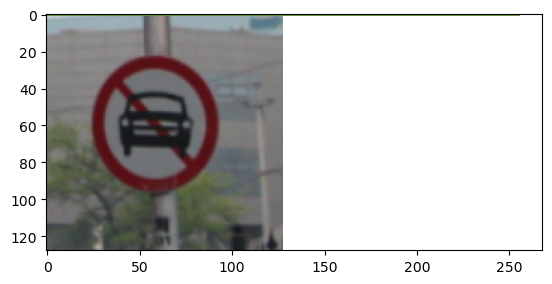

In [259]:
hist_features_ls = []

for img in img_ls:
    r_hist = cv2.calcHist(img, [0], None, [256], [0, 256])
    g_hist = cv2.calcHist(img, [1], None, [256], [0, 256])
    b_hist = cv2.calcHist(img, [2], None, [256], [0, 256])
    r_hist, g_hist, b_hist = r_hist/(128*128), g_hist/(128*128), b_hist/(128*128)
plt.plot(r_hist)
plt.plot(b_hist)
plt.plot(g_hist)

# ML Model Training #

# Evaluate #